# SVD et compression d'image

L'objectif de ce TP est d'explorer la SVD. Vous commencerez par implémenter un algorithme pour calculer la SVD, puis vous étudierez comment elle est liée à la méthode des moindres carrés. Enfin, vous découvrirez une application moins conventionnelle de la SVD. 

## Algorithme de SVD

Soit $M$ une matrice de $\mathcal {R}^{n,m}$.

Dans cette partie, posons $n = 200$ et $m = 2$. On fabriquera la matrice M comme suit :

In [33]:
import numpy as np

def generate_points(n, P):
  """Génère n points aléatoires dans le cercle unitaire, multipliés par la matrice P.

  Args:
    n: Nombre de points à générer.
    P: Matrice à multiplier avec les points générés.

  Returns:
    Un tableau numpy de forme (n, 2) contenant les points générés.
  """

  M = np.zeros((n, 2))
  ind = 0

  while ind < n:
    point = 2 * (0.5 - np.random.rand(1, 2))
    if np.linalg.norm(point) < 1:
      M[ind, :] = point
      ind += 1

  return M @ P

Dans la suite, on choisra $P$ :
$$P=\left(\begin{matrix} −1.5 & 3.2 \\ 1.2 & −0.4 \end{matrix}\right)$$

Calculer les valeurs propres $\lambda_i$ et vecteurs propres vi de la matrice $M^T × M$ – avec la fonction dédiée de python


In [118]:
### Ecrire le code du calcul
P = np.array([[-1.5, 3.2],
              [1.2, -0.4]])

M = generate_points(10, P)
D = M.T@M
l, V = np.linalg.eig(D)
print(l)

[ 1.86983458 13.22122835]


On pose $S = diag(\sqrt{\lambda_i})$ et $V$ la matrice des vecteurs propres.
Calculer $U = M × V^T \times S^{-1}$

In [138]:
### Ecrire le code du calcul
iS = np.zeros([2,10])

np.fill_diagonal(iS, 1./np.sqrt(l))

S = np.zeros([10,2])
np.fill_diagonal(S, np.sqrt(l))

U = M @ V @ iS
print(U@S@V.T - M)

[[ 2.77555756e-17  5.55111512e-17]
 [-2.77555756e-17 -5.55111512e-17]
 [-2.22044605e-16  5.55111512e-17]
 [-2.22044605e-16 -1.66533454e-16]
 [ 2.22044605e-16 -5.55111512e-17]
 [-1.11022302e-16  1.11022302e-16]
 [-2.22044605e-16  2.22044605e-16]
 [ 3.46944695e-17  5.55111512e-17]
 [-5.55111512e-17 -6.93889390e-18]
 [ 0.00000000e+00 -4.44089210e-16]]


Vérifier que $U$, $S$ et $V$ correspondent bien au retour de la fonction _svd_ de python !

In [130]:
### Ecire le code de vérification
Uh, Sh, Vh= np.linalg.svd(M)
print(Uh)

[[ 4.88337358e-02  2.70300928e-01  3.83324719e-01  3.60008816e-01
  -3.20902428e-01  2.32529879e-01  4.96375028e-01 -4.12835220e-02
   7.31880238e-02 -4.87350993e-01]
 [-4.94041050e-02 -1.41199981e-01 -2.29628315e-01 -4.50561874e-01
   1.75023096e-01  1.76002382e-02 -8.51094020e-02  1.40463789e-01
  -6.64811140e-02 -8.12127057e-01]
 [ 1.38975638e-01 -4.30505263e-01  8.39093694e-01 -1.96306801e-01
   1.31392643e-01 -6.74259720e-02 -1.67532224e-01  3.95928790e-02
  -3.50766808e-02 -7.81655896e-03]
 [-2.42604729e-02 -5.72755237e-01 -1.79907899e-01  7.40178080e-01
   1.43953675e-01 -4.84489761e-02 -1.50873978e-01  6.41401089e-02
  -4.31059705e-02 -1.98311439e-01]
 [-1.27685400e-01  3.48058355e-01  1.32594215e-01  1.58810593e-01
   8.91509868e-01  5.75359994e-02  1.40724459e-01 -3.11703313e-02
   2.86199925e-02 -7.44900295e-03]
 [ 1.87687619e-01 -1.48648048e-01 -7.83791884e-02 -6.86837502e-02
   6.59766561e-02  9.49162620e-01 -1.05947423e-01  6.01335849e-03
  -1.44899760e-02  1.22811991e-01

Tracer ensuite tous les points de M, et superposer les droites définies par les colonnes de $V$ et le point $0$.
On pourra utiliser _.axis('equal')_ pour afficher le graph dans un repère orthonormal.

(-1.2179812688224987,
 1.602422829141944,
 -3.1398526599576706,
 0.8690914958160131)

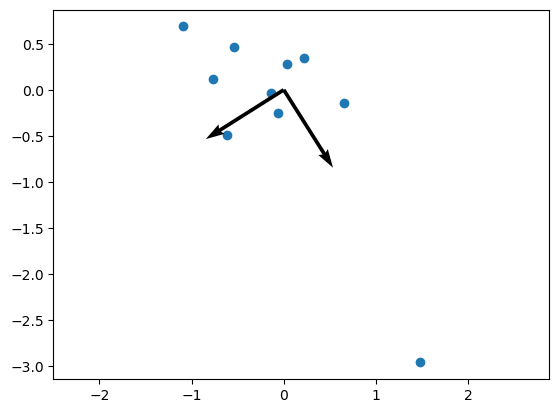

In [139]:
### Ecrire le code pour faire le graph
import matplotlib.pyplot as plt

plt.scatter(M[:,0], M[:,1])
plt.quiver(0, 0, V[0,0], V[1,0], angles='xy',scale_units='xy', scale=1)
plt.quiver(0, 0, V[0,1], V[1,1], angles='xy',scale_units='xy', scale=1)

plt.axis("equal")

Pouvez vous en conclure quelque chose ?

## Résolution de système hyperstatique et SVD

La SVD (Décomposition en Valeurs Singulières) est une méthode puissante et robuste pour résoudre des systèmes linéaires surdéterminés, c'est-à-dire lorsque nous avons plus d'équations que d'inconnues. En d'autres termes, nous cherchons à résoudre le système linéaire :

$$Mx = b$$

où :

- $M$ est une matrice de taille $m \times n$ (avec $m >> n$), représentant les coefficients du système.
- $x$ est un vecteur de taille $n \times 1$, contenant les inconnues.
- $b$ est un vecteur de taille $m \times 1$, représentant les termes connus.

En se basant sur la décomposition SVD,$M = U\Sigma V*$, où $U$ et $V$ sont des matrices unitaires et $\Sigma$ est une matrice diagonale contenant les valeurs singulières de $M$, la solution des moindres carrés est donnée par :

$$x = V\Sigma^+ U \times b$$

où $\Sigma^+$ est la pseudo-inverse de $Σ$, obtenue en inversant les valeurs singulières non nulles.

### Application

Étant donné un ensemble de m points de données $(t_i, b_i)$, nous cherchons à déterminer les coefficients d'un polynôme de degré $n-1$ de sorte que la somme des carrés des écarts entre les valeurs du polynôme aux abscisses $t_i$ et les valeurs observées $b_i$ soit minimale.

L'objectif est de trouver le polynôme 
$$p(t) = x_0 +x_1t +x_2 t^2 +\ldots + x_{n-1}t^{n-1}$$

qui approche au mieux les points $(t_i, b_i)$ au sens des moindres carrés.

On considère les données suivantes

| t | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 |
|---|----|----|----|----|----|----|----|----|----|----|----|
| b | 2  | 7  | 9  | 12 | 13 | 14 | 14 | 13 | 10 | 8  | 4  |

Calculer, par SVD, les coefficients du polynôme de degré $2$ approximant les données.

In [ ]:
### Code de calcul de

## Compression d’image et SVD


1. Télécharger l’image en noir et blanc [ici](https://negativespace.co/wp-content/uploads/2017/04/negative-space-black-white-london-street-Custom.jpg)
2. 
Importer l'image – par exemple sous le nom M.
3. 
Réenregistrer la matrice résultante en double.
4. 
Faire une SVD de $M$, récupérant les matrices $U$, $S$ et $V$ .


In [ ]:
### Code de pour la SVD d'une image

5. Faire une boucle affichant le résultat du produit $U (:, i) × S (1 : i, 1 : i) × V (:, 1 : i)^T$


In [ ]:
### Code de l'affichage

6. Conclusions sur la compression d’image à l'aide de la SVD ?